# Project 5
# Submitted By: Prateek Kumar
### Notebook 2

In [1]:
#importing the package
import pickle 
import pandas as pd
import numpy as np

In [2]:
pickle_in = open("data.pkl", "rb") #importing the final converted pickle file
df_new = pickle.load(pickle_in)

In [3]:
df_new.head() 

,track_name,play_times,percent_male,average_age_listener,percent_once,percent_five+
0,Mr. Misery,4,0.0,27,0,0
1,Lights In The Sky,19,0.0,25,0,0
2,Just As The Tide Was Flowing,2,0.0,22,0,0
3,"Murder (Live, Bbc)",1,0.0,22,100,0
4,Noon As Dark As Midnight,2,0.0,27,0,0


In [4]:
pickle_in = open("data1.pkl", "rb") #importing the merged master dataframe
df_main = pickle.load(pickle_in)

In [5]:
df_main.head()

,user_id,timestamp,artist_id,artist_name,track_id,track_name,gender,age,country,r_date
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,m,NaN,Japan,"Aug 13, 2006"
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006"
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006"
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006"
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006"


In [6]:
#finding the number of times a song has been played
df_scount = df_main.groupby(['user_id','track_name']).size() 

In [7]:
df_scount=df_scount.reset_index(level=[0,1]) #resetting the index

In [8]:
df_scount.columns=['user_id','track_name','play_count'] #renaming the columns

In [9]:
df_scount.head()

,user_id,track_name,play_count
0,user_000001,'84 Pontiac Dream,14
1,user_000001,(All I Wanted Was To Make You) Feel Good,3
2,user_000001,(D)Ecaying Beauty,1
3,user_000001,(Far From) Home,1
4,user_000001,(Get Off Your) High Horse Lady,1


In [10]:
user_profiles = pd.read_table('userid-profile.tsv', sep = '\t') #reading the user profile data

In [11]:
user_profiles.columns = ['user_id','gender','age','country','r_date'] #renaming the columns

In [12]:
#joining the user profile dataset and dataframe with song play count
df_m1 = df_scount.merge(user_profiles,how='inner', left_on='user_id', right_on='user_id') 

In [81]:
df_m1.head()

,user_id,track_name,play_count,gender,age,country,r_date
0,user_000001,'84 Pontiac Dream,14,m,0.0,Japan,"Aug 13, 2006"
1,user_000001,(All I Wanted Was To Make You) Feel Good,3,m,0.0,Japan,"Aug 13, 2006"
2,user_000001,(D)Ecaying Beauty,1,m,0.0,Japan,"Aug 13, 2006"
3,user_000001,(Far From) Home,1,m,0.0,Japan,"Aug 13, 2006"
4,user_000001,(Get Off Your) High Horse Lady,1,m,0.0,Japan,"Aug 13, 2006"


In [14]:
df_m1 = df_m1.fillna(0) #handling NaN values by replacing them with 0
df_m1.head()

,user_id,track_name,play_count,gender,age,country,r_date
0,user_000001,'84 Pontiac Dream,14,m,0.0,Japan,"Aug 13, 2006"
1,user_000001,(All I Wanted Was To Make You) Feel Good,3,m,0.0,Japan,"Aug 13, 2006"
2,user_000001,(D)Ecaying Beauty,1,m,0.0,Japan,"Aug 13, 2006"
3,user_000001,(Far From) Home,1,m,0.0,Japan,"Aug 13, 2006"
4,user_000001,(Get Off Your) High Horse Lady,1,m,0.0,Japan,"Aug 13, 2006"


In [77]:
len(df_m1['play_count'])

99880

In [15]:
!pip install --user pycountry #installing the pycountry package

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import pycountry #importing the pycountry package

In [17]:
#creating an empty dataframe to store the values
df_code = pd.DataFrame(columns=['track_name','gender','age','country','r_date'])

In [18]:
df_code['track_name'] = df_m1['track_name'] #importing the trackname and age values
df_code['age'] = df_m1['age']

In [19]:
#function to convert country to country code(numeric)
#we do not have country codes for "Venezuela", "Czech Republic" etc. in pycountry package so treating them as NaN
def country_code(v1):
    val=str(v1)
    if(val == "0" or val == "Cote D'Ivoire" or val == "Venezuela" or val == "Czech Republic" or val == "Congo, the Democratic Republic of the" or val == "Macedonia" or val == "Netherlands Antilles"):
        return(0)
    else:
        v2=pycountry.countries.get(name=val)
        code=int(v2.numeric)
        return(code)
    
df_code["country"] = df_m1["country"].apply(lambda x:(country_code(x)))

In [20]:
#function to convert gender to numeric values
def gender_code(v1):
    val=str(v1)
    val = val.replace('0','0')
    val = val.replace('m','1')
    val = val.replace('f','2')
    return(val)
    
df_code["gender"] = df_m1["gender"].apply(lambda x:(gender_code(x)))

In [21]:
#function to convert release date to numeric values
def date_code(v1):
    val=str(v1)
    if(val=="0"):
        return(0)
    
    x1=val.split(' ')[0]
    x2=val.split(' ')[1].split(',')[0]
    x3=val.split(',')[1]
    
    if(x1=='Jan'):
        m=1
    if(x1=='Feb'): 
        m=2
    if(x1=='Mar'):
        m=3
    if(x1=='Apr'): 
        m=4
    if(x1=='May'):
        m=5
    if(x1=='Jun') :
        m=6
    if(x1=='Jul') :
        m=7
    if(x1=='Aug') :
        m=8
    if(x1=='Sep') :
        m=9 
    if(x1=='Oct') :
        m=10
    if(x1=='Nov') :
        m=11
    if(x1=='Dec') :
        m=12
        
    value=((10000*int(x3))+(100*int(m))+int(x2))
    return(value)

df_code["r_date"] = df_m1["r_date"].apply(lambda x:(date_code(x)))

In [22]:
df_code.head() #displaying the strings converted to numeric values

,track_name,gender,age,country,r_date
0,'84 Pontiac Dream,1,0.0,392,20060813
1,(All I Wanted Was To Make You) Feel Good,1,0.0,392,20060813
2,(D)Ecaying Beauty,1,0.0,392,20060813
3,(Far From) Home,1,0.0,392,20060813
4,(Get Off Your) High Horse Lady,1,0.0,392,20060813


In [23]:
#saving the unique track_names into list my_list
my_list = list(set(df_code['track_name']))

In [24]:
#creating empty dataframe to store the corresponding track code for each individual tracks
track_code = pd.DataFrame(columns=['track_code','track_name'])

for i in range(0,len(set(df_code['track_name']))):
    track_code.loc[len(track_code)] = [i, my_list[i]]

track_code.head() #we can now use the track names as numeric as well

,track_code,track_name
0,0,Mr. Misery
1,1,Violet Hill
2,2,Terminal Breakdown
3,3,The Marsist
4,4,Secret Sun


In [25]:
# joining the numeric values dataframe and track code dataframe
lr_new = df_code.merge(track_code,how='inner', left_on='track_name', right_on='track_name')

In [26]:
lr_new.head() #We now have all our data values as numeric

,track_name,gender,age,country,r_date,track_code
0,'84 Pontiac Dream,1,0.0,392,20060813,39384
1,'84 Pontiac Dream,2,28.0,840,20050330,39384
2,(All I Wanted Was To Make You) Feel Good,1,0.0,392,20060813,16433
3,(D)Ecaying Beauty,1,0.0,392,20060813,18368
4,(Far From) Home,1,0.0,392,20060813,34879


In [79]:
#extracting the numeric values from our dataframe
lr_new_data = lr_new[['gender','age','country','r_date','track_code']]
lr_new_data.head()

,gender,age,country,r_date,track_code
0,1,0.0,392,20060813,39384
1,2,28.0,840,20050330,39384
2,1,0.0,392,20060813,16433
3,1,0.0,392,20060813,18368
4,1,0.0,392,20060813,34879


In [28]:
#importing the required package for regression
from sklearn.model_selection import train_test_split
from sklearn import svm

In [29]:
#transforming our table data into arrays
lis1,lis2=[],[]
#for i in range(0,df_code.shape[0]):
for i in range(0,1000):
    lis1=[lr_new_data.iloc[i][0], int(lr_new_data.iloc[i][1]), int(lr_new_data.iloc[i][2]), int(lr_new_data.iloc[i][3]), int(lr_new_data.iloc[i][4])]
    np.array(lis1)
    lis2.append(lis1)

In [30]:
#details about the listeners
data1 = np.array(lis2) #data

#response variable: number of times the song has been played
data_t = np.array(df_m1['play_count'][0:1000]) #target

In [250]:
data1 = data1.astype('int') #we can see that our data is successfully converted to an array
data1

array([[       1,        0,      392, 20060813,    39384],
       [       2,       28,      840, 20050330,    39384],
       [       1,        0,      392, 20060813,    16433],
       ...,
       [       1,        0,      392, 20060813,    75662],
       [       2,       28,      840, 20050330,    75662],
       [       1,        0,      392, 20060813,    54152]])

In [251]:
print 'Data Shape', data1.shape  #Shape of data and target
print 'Target Shape', data_t.shape

Data Shape (1000, 5)
Target Shape (1000,)


In [208]:
from sklearn.model_selection import train_test_split

#split data set
X_train, X_test, y_train, y_test = train_test_split(data1, data_t, test_size=0.2)

In [200]:
X_train.shape, y_train.shape #shape of training data

((800, 5), (800,))

In [201]:
X_test.shape, y_test.shape #shape of training data

((200, 5), (200,))

### K-Fold Cross Validation

In [82]:
lr_new_data1 = lr_new_data[0:1000]

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, lr_new_data, df_m1['play_count'], cv=3) #3-fold
print '3-fold CV:' ,np.mean(cvscores_3)

# Perform 5-fold CV
cvscores_5 = cross_val_score(reg, lr_new_data, df_m1['play_count'], cv=5) #5-fold
print '5-fold CV:' ,np.mean(cvscores_5) 

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, lr_new_data, df_m1['play_count'], cv=10) #10-fold
print '10-fold CV:', np.mean(cvscores_10) 

3-fold CV: -0.007117153183939721
5-fold CV: -0.05322454381206378
10-fold CV: -0.4540057953330865


In [192]:
from sklearn.model_selection import KFold # import KFold

X = df_temp
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)

In [194]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)

('TRAIN:', array([14715, 14716, 14717, ..., 29427, 29428, 29429]), 'TEST:', array([    0,     1,     2, ..., 14712, 14713, 14714]))
('TRAIN:', array([    0,     1,     2, ..., 14712, 14713, 14714]), 'TEST:', array([14715, 14716, 14717, ..., 29427, 29428, 29429]))


In [220]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# R^2 score: 1 is perfect prediction
print('R^2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 40.11
R^2 score: -0.04


## Residual

In [189]:
from sklearn import metrics

X = data1
y = data_t
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X.astype('int64'))

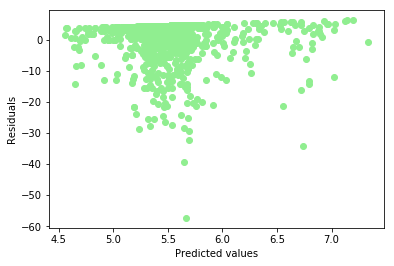

In [190]:
plt.scatter(y_hat, y_hat-y, c='lightgreen', label='Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0)
plt.show()

In [191]:
from sklearn import metrics

print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())

('MSE:', 45.23223172219865)
('R^2:', -322.0774975774292)
('var:', 45.372235999999994)


Here the values are categorical which are converted to numeric and then applied linear regression. So we can see we got a line but the points are skewed downwards.

The improvements which can be done are: 
1. Using numerical values which has a correlation amongst each other so that their cardinality is within the threshold value
2. The missing values should be handeled in the right manner

## Logistic Regression

In [241]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)
X_test = X_test.astype('int')
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110   0   0 ...   0   0   0]
 [ 80   0   0 ...   0   0   0]
 [ 35   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
             precision    recall  f1-score   support

          1       0.28      1.00      0.43       110
          2       0.00      0.00      0.00        80
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        26
          6       0.00      0.00      0.00        14
          7       0.00      0.00      0.00        13
          8       0.00      0.00      0.00        16
          9       0.00      0.00      0.00         6
         10       0.00      0.00      0.00         9
         11       0.00      0.00      0.00        10
         12       0.00      0.00      0.00         5
         13       0.00      0.00      0.00         8
         14       0.00      0.00      0.00         5
         15 

/home/campus16/prateekk/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
